In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk4 import rk_error_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, error_samplings, ratios, monitor) = rk_error_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, error_samplings) = rk_error_control_static_alpha_beta(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    # for this_x in xs:
    #     plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    # plt.plot(t_eval, computed_solutions, label="computed solution")

    actual_solutions = solution(t_eval)
    # plt.plot(t_eval, actual_solutions, label="actual solution")

    # # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    # plt.title(f"actual solution vs interpolated solution tol={tol}")
    # plt.xlabel("t")
    # plt.ylabel('y')
    # plt.legend(loc="upper right")
    # plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    # plt.title(f"global error for tol={tol}")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    
    plt.figure()
    end_of_steps = [r[0] for r in ratios]
    ratios_at_end_of_steps = [r[1] for r in ratios]
    plt.plot(end_of_steps, ratios_at_end_of_steps)
    plt.axhline(y=1, color="red")
    plt.xlabel("t")
    plt.ylabel("ratio")
    # plt.title(f"error_estimate/exact_error at end of steps for tol={tol}")
    plt.show()

    # # shape of errors - graphs
    # plt.figure()
    # for (x_i, x_i_plus_1, hb) in error_samplings:
    #     num_points = 100
    #     pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
    #     errors = []
    #     for i, pt in enumerate(pts_to_sample):
    #         y = solution([pt])[0]
    #         hb_eval = hb.eval(pt)
    #         error = abs(hb_eval - y)
    #         errors.append( error )

    #         # # print the error at the extremities
    #         # if i == 0:
    #         #     interpolation_error = hb_eval - hb.y_i
    #         #     print("error=", error, "interpolation_error=", interpolation_error)

    #         # if i == len(pts_to_sample) - 1:
    #         #     interpolation_error = hb_eval - hb.y_i_plus_1
    #         #     print("error=", error, "interpolation_error=", interpolation_error)

    #     maximum_error = max(errors)
    #     scaled_errors = [error / (maximum_error) for error in errors]

    #     # str_x_i = "{:.3f}".format(x_i)
    #     # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
    #     x_axis = [i/(num_points - 1) for i in range(num_points)]
    #     plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    # plt.title("plot of shape of errors")
    # plt.xlabel("step scaled between 0 and 1")
    # plt.ylabel('scaled error')
    # # plt.legend()
    # plt.show()

    # # ====================================== figure of satisfying global defect
    # actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    # hb_prime_evals = [first_deriv(x) for x in t_eval]
    # plt.figure()
    # plt.plot(t_eval, actual_f_evals)
    # plt.plot(t_eval, hb_prime_evals)
    # plt.title(f"first derivative for tol={tol}")
    # plt.show()

    # defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    # plt.figure()
    # plt.plot(t_eval, defects)
    # plt.title(f"global defect for tol={tol}")
    # plt.show()
    
    # # ====================================== end figure of satisfying global defect

    # # ====================================== figure of defect shape

    # minimum_step_size = 0.01
    # defects_small_steps = []
    # plt.figure()
    # for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
    #     num_points = 100
    #     pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
    #     defects = []
    #     for pt in pts_to_sample:
    #         y = solution([pt])[0]
    #         f_eval  = model(pt, y)[0]
    #         hb_prime_eval = hb.prime(pt)
    #         defects.append( abs(hb_prime_eval - f_eval) )
    #     maximum_defect = max(defects)
    #     # minimum_defect = min(defects)
    #     # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
    #     plot_vals = [ defect/ maximum_defect for defect in defects]
    #     #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    #     x_axis = [i/(num_points - 1) for i in range(num_points)]

    #     if (x_i_plus_1 - x_i < minimum_step_size):
    #         defects_small_steps.append([x_axis, plot_vals])
    #         continue
    #     plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    # plt.title("plot of defects")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # # plt.legend()
    # plt.show()
    # # ====================================== end figure of defect

    # # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in defects_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of defects on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.show()
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.49999999999999967, 0.9999999999999987, 0.5000000000000007]
n_steps 29
n_successful_steps 27

integration complete


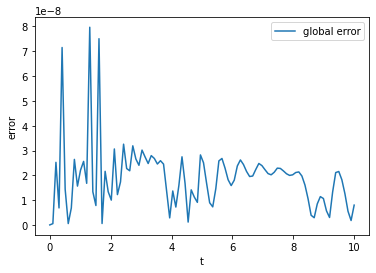

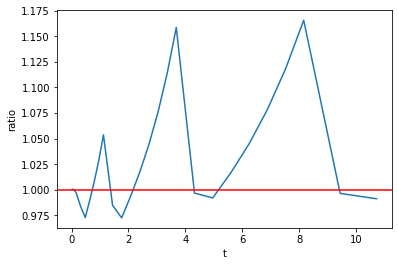

0.0
0.0
1.7030821197749901e-13
4.901523631417604e-12
1.1872092198217388e-10
2.1053596643838546e-09
1.4358661148961005e-08
2.1856594645264238e-08
2.5520167867831844e-08
2.6809523934190338e-08
2.6749483739152424e-08
2.5964641658937637e-08
2.951789190852594e-08
3.284423599758668e-08
3.3916267128120126e-08
3.33959589982058e-08
3.200702913819242e-08
3.02209690050681e-08
2.8307935440174958e-08
2.6412873610492937e-08
2.805015669737898e-08
2.8434664400833753e-08
2.7712077688146763e-08
2.6372787731432368e-08
2.476696331354944e-08
2.3097940837768505e-08
2.1473126110560514e-08
2.215579586462013e-08
2.2187381099048054e-08


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 0.5000000000000002, 1.0000000000000007, 0.49999999999999967, 0.9999999999999987, 0.5000000000000007]
n_steps 49
n_successful_steps 38

integration complete


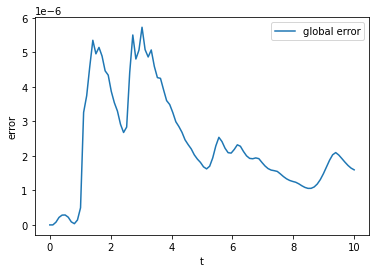

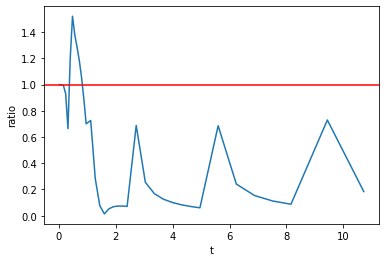

0.0
0.0
2.4991120284312274e-13
1.6223355991940025e-11
1.0332492639264501e-09
6.459950252502011e-08
1.5132335462464397e-07
2.3379020031022435e-07
2.8597032286636903e-07
2.9235684140260787e-07
2.5131602765515737e-07
1.7254603013050485e-07
7.15015108232464e-08
3.6031569061734103e-08
1.3742372328984231e-07
2.2451424053215874e-07
3.272683096355866e-06
4.861627340702057e-06
5.396640753996262e-06
5.300059166990501e-06
4.88238845447464e-06
4.337267152765278e-06
3.772596994466859e-06
3.2421578742558577e-06
2.7685156209211748e-06
5.560827417649961e-06
5.686359837608901e-06
4.9993941512310736e-06
4.1604728793359635e-06
3.388557354384869e-06
2.740540402182412e-06
2.2164278030908924e-06
1.7989184103936462e-06
2.5239794040378405e-06
2.313779748745054e-06
1.910326525182693e-06
1.523962643832505e-06
1.204002940884824e-06
2.0767758171398587e-06
1.8126739370818296e-06


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 0.5000000000000002, 2.000000000000001, 0.9999999999999987]
n_steps 21
n_successful_steps 20

integration complete


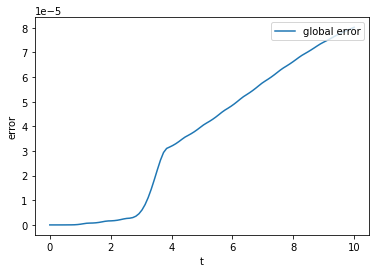

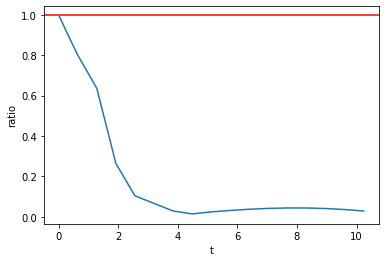

0.0
0.0
4.440892098500626e-16
1.9761969838327786e-14
6.368239269249898e-13
2.0509371978505442e-11
6.650360262483446e-10
2.1832756491591e-08
7.327120796762898e-07
1.6106822973149804e-06
2.6692584100818095e-06
3.1056302714826955e-05
3.591057068197401e-05
4.113655967330487e-05
4.665719561991466e-05
5.2364694811402046e-05
5.812098073310068e-05
6.376126494611611e-05
6.910122169045962e-05
7.394772066326993e-05
7.811247987987713e-05
8.142735245364463e-05


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.9999999999999987, 1.0000000000000029, 0.9999999999999972, 2.0, 0.5000000000000028, 1.000000000000011, 2.000000000000022, 2.0000000000000444, 1.0000000000000444, 2.000000000000089, 0.9999999999999556, 1.0000000000000222, 0.9999999999999889, 0.4999999999999889, 0.9999999999999944]
n_steps 636
n_successful_steps 541

integration complete


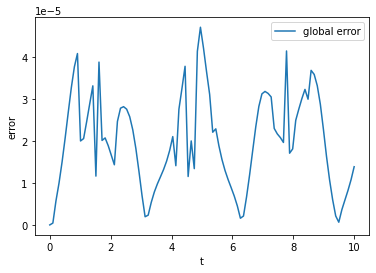

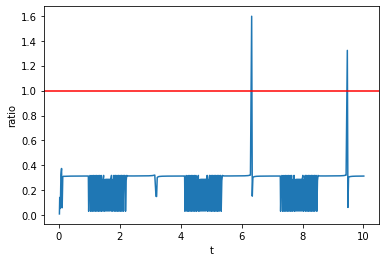

0.0
0.0
2.618724448074164e-05
1.9440257841944752e-05
1.0808822108684252e-05
5.320904866573661e-06
1.3558412344176485e-05
4.104367179458279e-06
1.2726357316861225e-06
3.939725996660037e-06
5.519424598421363e-06
6.710253671438071e-06
7.766165530470603e-06
8.774440471148726e-06
9.76430095139813e-06
1.0745279280660602e-05
1.1720299665340939e-05
1.269007860926763e-05
1.3654597177947814e-05
1.4613592582701784e-05
1.5566722242510433e-05
1.651361858667766e-05
1.7453907425413195e-05
1.8387214174631072e-05
1.931316603015487e-05
2.02313927924469e-05
2.1141527239199043e-05
2.2043205347599404e-05
2.2936066464585014e-05
2.381975345977505e-05
2.4693912870965562e-05
2.5558195046015975e-05
2.641225428368088e-05
2.725574897199934e-05
2.808834172407515e-05
2.8909699513857134e-05
2.971949380925487e-05
3.0517400703589104e-05
3.130310104437761e-05
3.207628056201006e-05
3.2836629995314226e-05
3.358384521434665e-05
3.431762734307231e-05
3.5037682878380494e-05
3.574372380776847e-05
3.643546772424955e-05
3.7112

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 1.9999999999999987, 0.5000000000000007, 2.0, 1.0000000000000056, 0.9999999999999944, 2.0000000000000444, 0.9999999999999556, 1.9999999999998224, 0.4999999999999889, 0.5000000000000444, 1.0000000000000888]
n_steps 559
n_successful_steps 421

integration complete


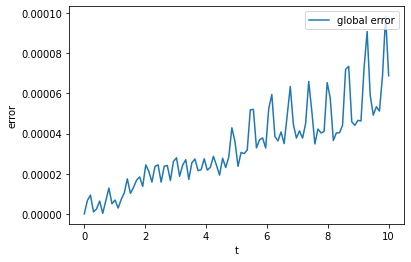

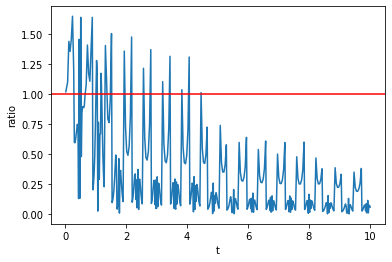

0.0
0.0
6.161256393966141e-09
2.0676973866429194e-07
6.037243259537917e-06
9.734982623132993e-06
1.0871601607842507e-05
9.352486720182185e-06
5.325803080324931e-06
7.268974715479715e-07
9.853772957590934e-07
1.2547693015729777e-06
1.5191400351000084e-06
1.7686237414604733e-06
2.0356053522796458e-06
2.5014434079650982e-06
3.694957779520891e-06
6.388468219320487e-06
9.843573316015153e-06
9.977215752465796e-06
9.895069728482753e-06
9.6138602745377e-06
5.085920412373213e-06
2.1099779738964486e-06
9.344200486705034e-07
5.584646820544492e-07
3.913458077597909e-07
2.3637450485836098e-07
5.708592576425531e-08
1.374261526798648e-07
6.339196788829327e-06
1.0918345954458175e-05
1.3177930531682591e-05
1.2881182310131578e-05
1.0066502039496328e-05
5.054113255464898e-06
5.115421933599151e-06
5.2346435119865475e-06
5.441998268240766e-06
5.7745486528038015e-06
6.264495609142884e-06
6.893138097430196e-06
7.45837653015613e-06
7.335128824115245e-06
5.594801476993538e-06
2.9135127037616115e-06
2.902075576

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 0.5000000000000002, 1.0000000000000007, 0.49999999999999967, 0.9999999999999987, 0.5000000000000007]
n_steps 36
n_successful_steps 32

integration complete


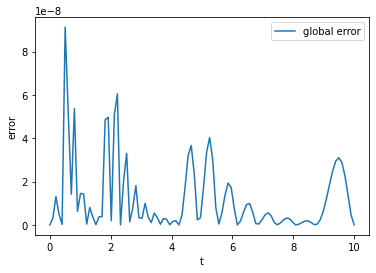

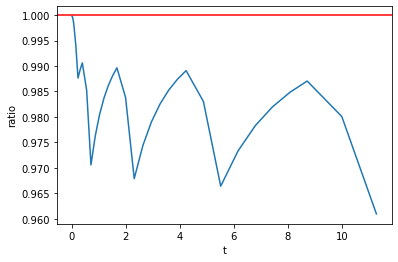

0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
0.0
5.551115123125783e-17
1.1102230246251565e-16
5.551115123125783e-17
0.0
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
8.326672684688674e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
8.326672684688674e-17
6.938893903907228e-17
5.551115123125783e-17
4.163336342344337e-17
4.163336342344337e-17
4.163336342344337e-17


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 0.5000000000000002, 2.000000000000001, 0.49999999999999967, 0.9999999999999987, 1.0000000000000029, 0.4999999999999986, 2.0, 2.000000000000011, 0.9999999999999944, 0.4999999999999972]
n_steps 68
n_successful_steps 61

integration complete


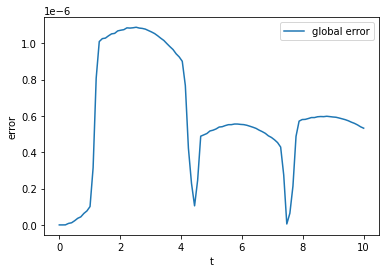

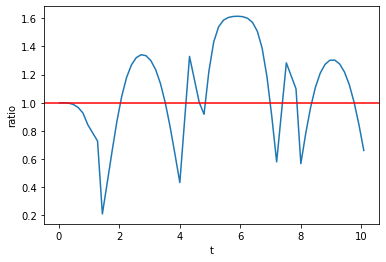

0.0
0.0
1.2212453270876722e-15
5.6066262743570405e-14
2.8617108682738035e-12
1.5854584312080533e-10
9.196520101006911e-09
2.3155815598308038e-08
4.144065113287354e-08
6.336554514430048e-08
8.81755252146732e-08
1.0134495559421808e-06
1.028199837035948e-06
1.0427712433397351e-06
1.0563804750951533e-06
1.0682999826427952e-06
1.0778745785922084e-06
1.0845356915312188e-06
1.0878129735880648e-06
1.0873430489333202e-06
1.082875272673256e-06
1.074274447621093e-06
1.0615205253694526e-06
1.0447053948592355e-06
1.0240269306960315e-06
9.997805395789428e-07
9.723484979407004e-07
9.421874205273184e-07
9.098142378927143e-07
2.317753491354324e-07
4.888910093703291e-07
5.035646662363003e-07
5.172691411592378e-07
5.294920673581949e-07
5.397779270222003e-07
5.47737778799906e-07
5.530569882616909e-07
5.555008296687092e-07
5.549178825337009e-07
5.512412066810413e-07
5.44487336662236e-07
5.34753187619863e-07
5.222110195934881e-07
5.07101647451158e-07
4.897261242087225e-07
4.70436158306331e-07
4.496235459505

In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 0.5000000000000002, 1.0000000000000007, 0.49999999999999967]
n_steps 37
n_successful_steps 32

integration complete


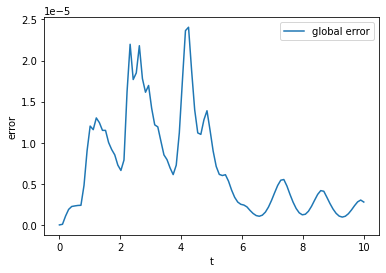

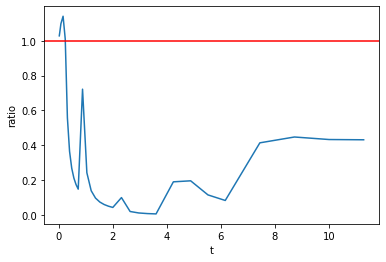

0.0
0.0
3.2564728691397704e-11
1.049336506575571e-09
3.2062330901361236e-08
9.338256899971142e-07
1.5682262641814049e-06
1.994612573108512e-06
2.260627999794984e-06
2.4043746964519386e-06
2.4561934894307136e-06
2.440126029013001e-06
2.375114238062359e-06
9.583720594619205e-06
1.2666247768133854e-05
1.3341895420126981e-05
1.2697702509556485e-05
1.1405848383994055e-05
9.869347299074072e-06
8.31905874598693e-06
6.877751515976804e-06
2.211756335090964e-05
2.1427505631610444e-05
1.645549964801596e-05
1.1400238569381216e-05
7.449475059040367e-06
2.41635873239332e-05
1.337972685488964e-05
5.7286113390730975e-06
2.1983906566269695e-06
5.090708613320061e-06
3.88809931362033e-06
2.782292257919039e-06
1.9775227899643255e-06


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

# t_span_8 = [0, 10]
# eps = 0.1
# a = exp(-1/eps)
# y0_8 = [1, a/(eps*(-1+a))]

# def model8(t, y):
#     return [y[1], y[0]/eps]

# def solution8(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [(1-exp(x/eps)*a)/(1-a) for x in t]

# experiment(model8, y0_8, t_span_8, solution8)

# ## the results were extremely bad. So i wanted to see the solution
# plt.figure()
# plt.plot(t_span_8, solution8(t_span_8))



In [13]:
# Jeff cash test set second one
# t_span_9 = [0, 10]
# eps = 0.1
# y0_9 = [1, -1/sqrt(eps)]

# def model9(t, y):
#     return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

# def solution9(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [exp(-x/sqrt(eps)) for x in t]

# experiment(model9, y0_9, t_span_9, solution9)

In [14]:
# Wolfram Alpha first problem

# t_span_10 = [0, 10]
# y0_10 = [1, 2]

# def model10(t, y):
#     return [y[1], -3*y[0] + 2*cos(4*t)]

# def solution10(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     s = sqrt(3)
#     return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

# experiment(model10, y0_10, t_span_10, solution10)